In [153]:
from sympy import *
from sympy.solvers.ode.systems import dsolve_system
x, y = symbols("x y", cls=Function)
t = symbols("t")

k = symbols('k')

T1 = 0.00025 #0.035 m / 140 rad from TSA test
T2 = 3 #guess for leg movement/string contract
m_a = 1/2 * 0.020 * 0.010**2
m_l = 0.1 #mass to push off ground
k = 1000 # no idea honestly
f_a = 0.01

eqs = [
    Eq(x(t).diff(t).diff(t), -(T1**2*k/m_a)*x(t) - (T1*k/(T2*m_a))*y(t) + f_a/m_a), 
    Eq(y(t).diff(t).diff(t), (k*T1/(T2*m_l))*x(t) - (k/(T2**2*m_l))*y(t))
]
display(eqs[0], eqs[1])

sol = dsolve_system(eqs, ics={x(0):0, y(0):0, x(t).diff(t).subs(t,0):0, y(t).diff(t).subs(t,0):0})
# sol = dsolve_system(eqs)

xeq = simplify(sol[0][0])
yeq = simplify(sol[0][1])
display(xeq, yeq)

Eq(Derivative(x(t), (t, 2)), -62.5*x(t) - 83333.3333333333*y(t) + 10000.0)

Eq(Derivative(y(t), (t, 2)), 0.833333333333333*x(t) - 1111.11111111111*y(t))

Eq(x(t), 80.7534231680233*sin(11.5558454962282*t)**2 - 0.753423168023285*sin(32.2501712550246*t)**2 + 80.7534231680233*cos(11.5558454962282*t)**2 - 80.7534231680236*cos(11.5558454962282*t) - 0.753423168023285*cos(32.2501712550246*t)**2 + 0.753423168023284*cos(32.2501712550246*t))

Eq(y(t), 0.0688383186958417*sin(11.5558454962282*t)**2 - 0.00883831869584174*sin(32.2501712550246*t)**2 + 0.0688383186958417*cos(11.5558454962282*t)**2 - 0.068838318695842*cos(11.5558454962282*t) - 0.00883831869584174*cos(32.2501712550246*t)**2 + 0.00883831869584173*cos(32.2501712550246*t))

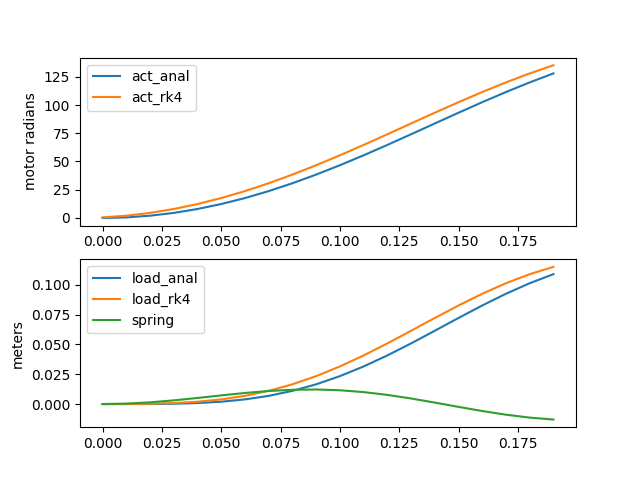

In [158]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

def RK4(f, X, dt):
    # Runge-Kutta 4 integration
    k1,log = f(X)
    k2,_ = f(X + (dt/2)*k1)
    k3,_ = f(X + (dt/2)*k2)
    k4,_ = f(X + dt*k3)
    return X + (dt/6)*(k1 + 2*k2 + 2*k3 + k4), log

def f(X):
    x, xd, y, yd = X
    xdd = -(T1**2*k/m_a)*x - (T1*k/(T2*m_a))*y + f_a/m_a 
    ydd = (k*T1/(T2*m_l))*x - (k/(T2**2*m_l))*y
    return np.array([xd, xdd, yd, ydd]), T1*T2*x-y

log = [[], [],[], [],[], []] #t, x_anal,y_anal, x_rk4,y_rk4, spring

dt = 0.01
X = np.zeros(4)
for ti in np.arange(0, 0.2, step=dt):
    x_anal = xeq.rhs.subs(t,ti).n()
    y_anal = yeq.rhs.subs(t,ti).n()

    X,spring = RK4(f, X, dt)
    x_rk4, xd_rk4, y_rk4, yd_rk4 = X

    log[0].append(ti)
    log[1].append(x_anal)
    log[2].append(y_anal)
    log[3].append(x_rk4)
    log[4].append(y_rk4)
    log[5].append(spring)

plt.close('all')
fig, axs = plt.subplots(2, 1)
axs[0].plot(log[0], log[1], label='act_anal')
axs[0].plot(log[0], log[3], label='act_rk4')
axs[0].set_ylabel("motor radians")

axs[1].plot(log[0], log[2], label='load_anal')
axs[1].plot(log[0], log[4], label='load_rk4')
axs[1].plot(log[0], log[5], label='spring')
axs[1].set_ylabel("meters")

[ax.legend() for ax in axs]
plt.show()
